In [1]:
from pandas import read_csv
# 使用Pandas导入CSV数据
filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
print(data.shape)

(768, 9)


In [2]:
from numpy import loadtxt
# 使用numpy导入CSV数据
filename = 'pima_data.csv'
with open(filename, 'rt') as raw_data:
    data = loadtxt(raw_data, delimiter=',')
    print(data.shape)

(768, 9)


In [3]:
from csv import reader
import numpy as np
# 使用标准的Python类库导入CSV数据
filename = 'pima_data.csv'
with open(filename, 'rt') as raw_data:
    readers = reader(raw_data, delimiter=',')
    x = list(readers)
    data = np.array(x).astype('float')
    print(data.shape)

(768, 9)


# 数据理解

In [4]:
from pandas import read_csv

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

# 查看数据规模和结构
print(data.shape)
print(data.dtypes)

(768, 9)
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [7]:
# 查看前10行，发现数据模式
print(data.head(3))

# 描述性统计，发现异常值
print(data.describe())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class 

In [8]:
# 类别分布分析
print(data.groupby('class').size())

class
0    500
1    268
dtype: int64


In [10]:
from pandas import set_option

set_option('display.width', 100)
set_option('display.precision', 2)
print(data.corr(method='pearson'))

       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


In [11]:
# 计算偏态系数
print(data.skew())

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64


In [12]:
# 检查缺失值
print(data.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [ ]:
# 数据可视化

# 数据可视化

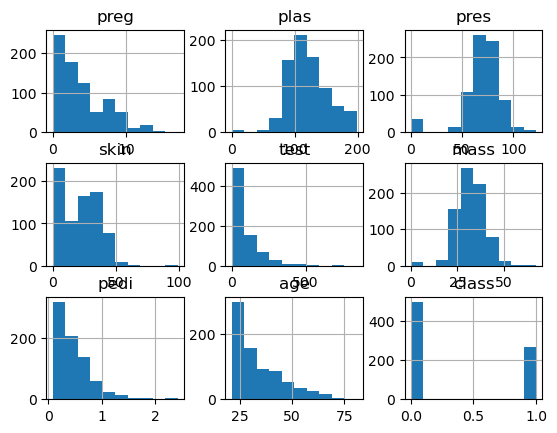

In [13]:
from pandas import read_csv
import matplotlib.pyplot as plt

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

# 直方图 - 揭示频率分布
data.hist()
plt.show()

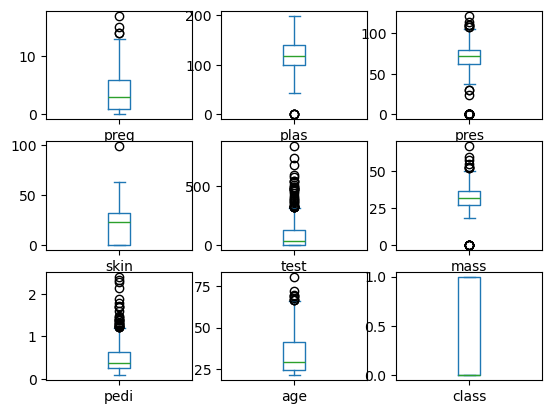

In [14]:
# 箱线图 - 识别异常值和四分位数
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)
plt.show()

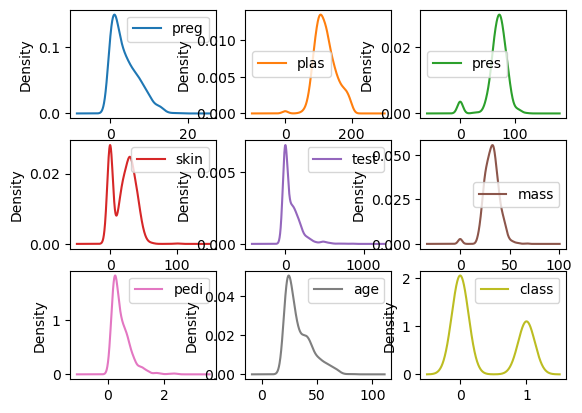

In [15]:
# 密度图 - 显示连续分布特征
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

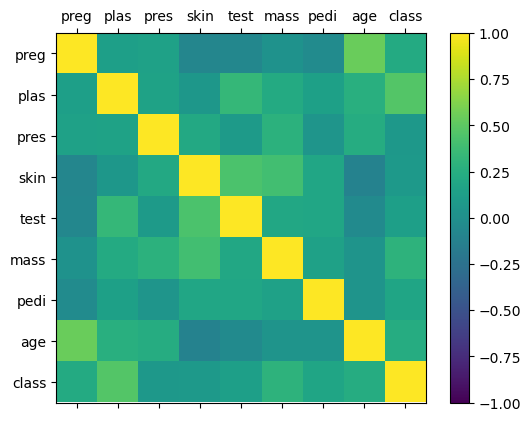

In [16]:
import numpy as np

# 相关性热力图 - 显示特征间关联强度
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


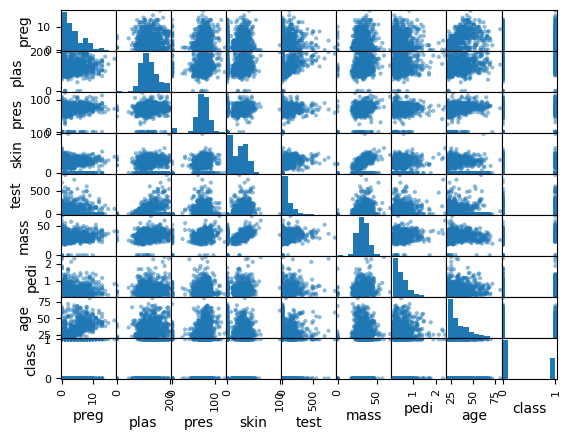

In [17]:
from pandas.plotting import scatter_matrix

# 散点图矩阵 - 显示特征间非线性关系
scatter_matrix(data)
plt.show()